In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [187]:
df = pd.read_csv('MarchCPS_1995_2015.csv')

In [188]:
df.head()

,year,wtsupp,age,sex,popstat,labforce
0,1995,929.61,48,2,1,1
1,1995,832.67,65,2,1,2
2,1995,787.95,10,2,3,0
3,1995,938.27,25,2,1,2
4,1995,900.74,21,1,1,2


In [189]:
df['labforce'].value_counts()

2    169589
1     97454
0     81623
Name: labforce, dtype: int64

## README about the data

## Includes 1995 and 2015 labor data
 WTSUPP		Supplement Weight
The CPS samples are weighted, with some records representing more cases than others. 
This means that persons and households with some characteristics are over-represented in the samples, while others are underrepresented.
To obtain representative statistics from the samples, users must apply sample weights.

 AGE		Age
Top codes:
1988-2001: 90+ coded as 90 
2002-2003: 80+ coded as 80 
2004-onward: 80-84 coded as 80, 85+ coded as 85

 SEX		Sex
1		Male
2		Female
9		Not in universe

 POPSTAT	Adult civilian, armed forces, or child
1		Adult civilian
2		Armed forces
3		Child

 LABFORCE	Labor force status
0		Not in universe
1		No, not in the labor force
2		Yes, in the labor force

In [190]:
df.head(10)

,year,wtsupp,age,sex,popstat,labforce
0,1995,929.61,48,2,1,1
1,1995,832.67,65,2,1,2
2,1995,787.95,10,2,3,0
3,1995,938.27,25,2,1,2
4,1995,900.74,21,1,1,2
5,1995,864.86,36,1,1,2
6,1995,864.86,33,2,1,2
7,1995,1044.21,2,2,3,0
8,1995,820.95,0,2,3,0
9,1995,798.48,90,2,1,1


In [191]:
weighted_sample = df.sample(n=len(df), weights = 'wtsupp')
weighted_sample

,year,wtsupp,age,sex,popstat,labforce
39941,1995,1655.10,72,2,1,1
39070,1995,1870.18,43,2,1,2
101813,1995,1629.70,18,2,1,2
198824,2015,3970.10,56,1,1,2
337143,2015,3112.56,69,2,1,1
...,...,...,...,...,...,...
64587,1995,47.83,49,2,1,2
298393,2015,100.36,5,1,3,0
64583,1995,50.46,34,1,1,2
64580,1995,56.45,5,1,3,0


# Question 1
1.	The LFPR is defined as the adult civilian share of the population that is in the labor force, expressed as a percentage. Create graphs showing LFPR age profiles (the LFPR at each age) in 1995 and 2015. Please create three separate graphs: one for men, one for women, and one for the full population.


## Total LFPR

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


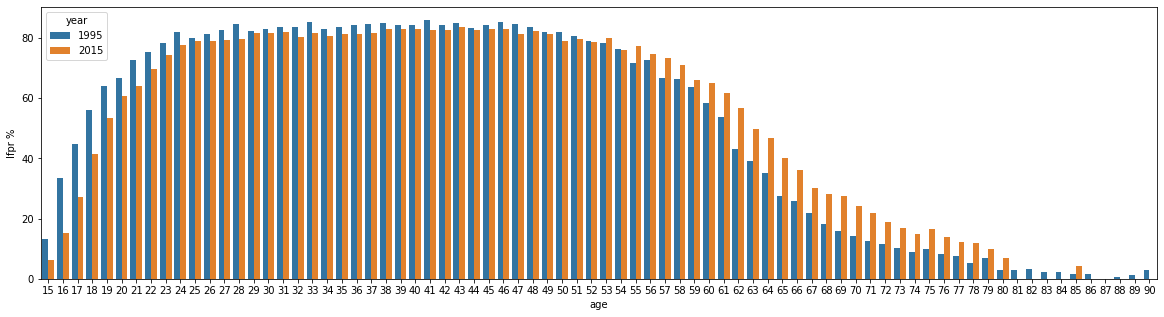

In [323]:
lf = df[df['popstat']==1][df['age']>=15]

workingpop_counts = (lf.groupby(['year','labforce'])['age']
         .value_counts()
         .rename('counts').reset_index()
         .sort_values('age'))

#sanity check
#lf[lf['labforce']==1][lf['age']==21][lf['year']==1995]

df_totpop = workingpop_counts.pivot_table(index=['age','year'], columns = 'labforce', values = 'counts' ).reset_index()
df_totpop=df_totpop.rename(columns = { 1 : 'unemployed', 2: 'employed'})
df_totpop['lfpr %'] = (df_totpop["employed"]/(df_totpop["unemployed"]+df_totpop["employed"]))*100

plt.figure(figsize=(20,5))
sns.barplot(x='age', y='lfpr %', hue='year', data=df_totpop)

plt.savefig('total population.png')

## Female LFPR

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


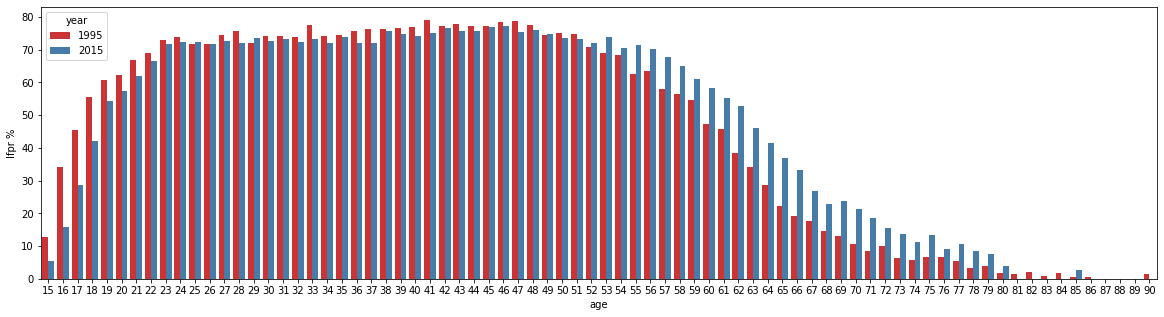

In [324]:
flf = df[df['popstat']==1][df['age']>=15][df['sex']==2]

fworkingpop_counts = (flf.groupby(['year','labforce'])['age']
         .value_counts()
         .rename('counts').reset_index()
         .sort_values('age'))

fdf_totpop = fworkingpop_counts.pivot_table(index=['age','year'], columns = 'labforce', values = 'counts' ).reset_index()
fdf_totpop=fdf_totpop.rename(columns = { 1 : 'unemployed', 2: 'employed'})
fdf_totpop['lfpr %'] = (fdf_totpop["employed"]/(fdf_totpop["unemployed"]+fdf_totpop["employed"]))*100

plt.figure(figsize=(20,5))
sns.barplot(x='age', y='lfpr %', hue='year', data=fdf_totpop,palette = "Set1")
plt.savefig('female population.png')

## Male LFPR

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


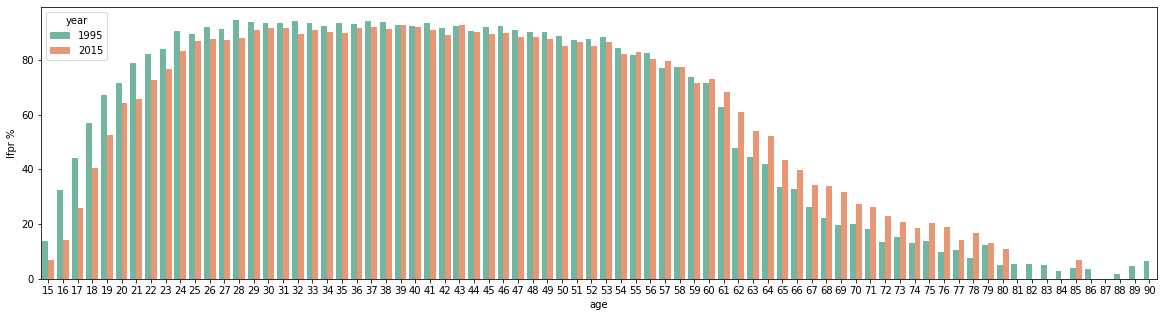

In [325]:
mlf = df[df['popstat']==1][df['age']>=15][df['sex']==1]

mworkingpop_counts = (mlf.groupby(['year','labforce'])['age']
         .value_counts()
         .rename('counts').reset_index()
         .sort_values('age'))

#sanity check
#lf[lf['labforce']==1][lf['age']==21][lf['year']==1995]

mdf_totpop = mworkingpop_counts.pivot_table(index=['age','year'], columns = 'labforce', values = 'counts' ).reset_index()
mdf_totpop=mdf_totpop.rename(columns = { 1 : 'unemployed', 2: 'employed'})
mdf_totpop['lfpr %'] = (mdf_totpop["employed"]/(mdf_totpop["unemployed"]+mdf_totpop["employed"]))*100

plt.figure(figsize=(20,5))
sns.barplot(x='age', y='lfpr %', hue='year', data=mdf_totpop, palette = "Set2")
plt.savefig('male population.png')


and also add in legends, scales etc.

## Question 2
2. The figures from Question 1 show a consistent pattern in the relationship between age and LFPR. What explains the shape of this age profile? In two or three sentences, describe the most important factors.

- the three LFPRs (male, female and total) all are shaped to be more uniform between the ages of 25-54. This consistency is evident because these are prime working ages, non-institutionalized civilians are typically employed within these ages and are at peak lifetime productivity and health
- another consistent pattern when comparing the LFPRs of the three demographics between the years of 1995 and 2015 are that there is a skewing of higher participation to the left for 1995 ,i.e., people were employed earlier in their life and retired early. this could be potentially explained by the lower college attendance rate in 1995 compared to 2015
- similarly, in 2015, there was higher LFPRs after the ages of 60 (compared to 1995). One possible explanation of this phenomenon could be improved healthcare and lower mortality, leading to healthier older populations in all three demographics

## Question 3
3. Calculate the aggregate LFPRs of persons aged 15 and over in 1995 and 2015. Please calculate the value separately for men, for women, and for the full population.


In [196]:
#for male population
mdf_totpop.groupby('year')['lfpr %'].mean()

year
1995    57.901230
2015    63.832043
Name: lfpr %, dtype: float64

In [197]:
# for female population
fdf_totpop.groupby('year')['lfpr %'].mean()

year
1995    47.400506
2015    53.148756
Name: lfpr %, dtype: float64

In [320]:
# for total population
df_totpop.groupby('year')['lfpr %'].mean()

year
1995    51.615587
2015    58.189910
Name: lfpr %, dtype: float64

In [321]:
# for total population
df_totpop.groupby('year')['lfpr %'].median()

year
1995    66.592054
2015    74.171584
Name: lfpr %, dtype: float64

In [322]:
#std deviation for total population
df_totpop.groupby('year')['lfpr %'].std()

year
1995    33.540977
2015    27.724135
Name: lfpr %, dtype: float64

## Question 4
4. Calculate the effect of population aging on the aggregate (full population) LFPR. Specifically, what would the aggregate participation rate of persons aged 15 and over have been in 2015 if the age distribution of the population were the same as it was in 1995?

In [301]:
change = df_totpop.pivot_table(index=['age'], columns='year', values='lfpr %').reset_index()
change['delta lfpr'] = change[2015] - change[1995]
change.head()

year,age,1995,2015,delta lfpr
0,15,13.276710,6.135531,-7.141179
1,16,33.395262,15.105163,-18.290100
2,17,44.843898,27.238922,-17.604976
3,18,56.173469,41.382834,-14.790636
4,19,63.881099,53.353396,-10.527703


In [317]:
print("mean of delta lfpr",change['delta lfpr'].mean() * 100, "%")
print("std dev of delta lfpr is ",change['delta lfpr'].std())

mean of delta lfpr 66.96215680520172 %
std dev of delta lfpr is  6.792264210172036


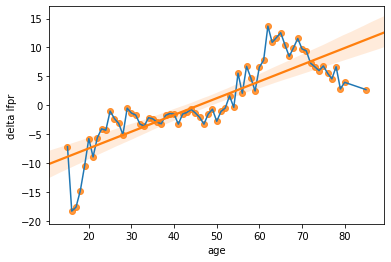

In [327]:
#LFPR(2015)- LFPR(1995), to show change in the participation rate between the 10 years
sns.lineplot(data = change, x= 'age', y= 'delta lfpr')
sns.regplot(x= 'age', y= 'delta lfpr',data = change, fit_reg=True )

plt.savefig('change in population.png')

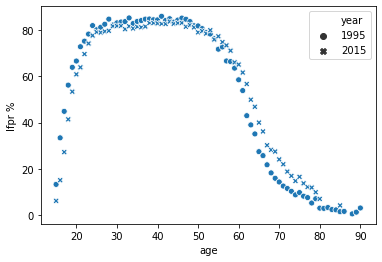

In [300]:
sns.scatterplot( x = 'age', y = 'lfpr %',data = df_totpop, style='year')

## Question 5
5. From Question 4, it is clear that changes in the population’s age structure account for some of the changes in LFPR. Write a paragraph or two describing some of the other major factors that might have contributed to changes in LFPR. Note: The answer to this question is not found in the data that we provided but involves doing some quick online research to understand the drivers of labor force participation.

### Answer
In the line graph showing the trend in 'delta LFPR', it is ecident that there are more older participants in the labor force in 2015 as compared to 1995. This could be elucidated by a couple of factors:
    - increased birth rate, reduced mortality rate: the improvement in healthcare knowledge and technology has helped reduce the rate of miscarraige and increased successful births since 1995. Coupled with advancements in neonatal care and general health care for all ages, the average age of employment has gone up from 66 in 1995 to 74 in 2015
    - economic conditions, namely inflation has increased the cost of living, while reducing the real cost of money, depreciating savings. It could also be hypothesized that general lifestyle changes like increased spending and reduced saving has resulted in the inter temporal budget constraint being heavily skewed towards time period 1. The increased money expenditure could also require extended participation in the labor force and delayed retirement which could explain the right skewing shown in the 2015 data
    - Female and male participation in the labor force has also increased since 1995, which could mean that there are more households with dual incomes. This hypothesis could be explared broadly by evaluating with respect to US GDP between 1995 and 2015.
    

## Question 6
6. Based on your answers to the previous questions, describe in two or three sentences how you would approach forecasting the LFPR in 2025. What data and variables would you use to make a projection?

With the dataset only containing data from the two years 1995 and 2015, it is difficult to guess the degree of growth in population i.e., linear or exponential. However for simplicity and demonstrated growth, I would assume a linear model of population growth with LFPR data for years from 1995 leading upto the latest year. The recession caused by the pandemic and the great resignation would likely be outliers to a conventional linear regression but are still valuable to incorporate. 

(At a very high level, I would also aim to potentially use a hierarchian bayesian model and control for the priors to estimate the posterior as a factor of age, unemployment rates and a Gaussian noise level.) -> potentially  overkill